# Neural Networks | TensorFlow
By **Stephan Djurhuus**
Institute **CPHBusiness**

Education **Software Development**
Elective **Artificial Intelligence**
Topic **Neural Networks/ Deep Learning**

## The Content
_only works in jupyter notebooks_

* [The Theory](#)  
  * [Normalization](#Normalization)  
  * [One Hot Encoding](#One-Hot-Encoding)
  * [Confusion Matrix](#Confusion-Matrix)
  * [Back Propagating](#Back-Propagating)
  * [Compiling](#Compiling)
    * [Loss Functions](#Loss-Functions)
    * [Epochs](#Epochs)
* [The Source](#The-Source)
  * [Environment | Imports](#Environment-|-Imports)
  * [Environment | Configuration](#Environment-|-Configuration)
  * [Data | Preparation](#Data-|-Preparation)
  * [Model | Configuration](#Model-|-Configuration)
  * [Model | Training](#Model-|-Training)
  * [Model | Save & Load](#Model-|-Save-&-Load)
  * [Model | Analysis](#Model-|-Analysis)
  * [Model | Prediction](#Model-|-Prediction)
___

## The Theory

### Normalization
The word “normalization” is used informally in statistics, and so the term normalized data can have multiple meanings. In most cases, when you normalize data you eliminate the units of measurement for data, enabling you to more easily compare data from different places. 

A common way to normalize data is to rescaling data to have values between 0 and 1. This is usually called feature scaling. One possible formula to achieve this is:

$$x_{new}=\dfrac{x-x_{min}}{x_{max}-x_{min}}$$

_[reference, statisticshowto.com](https://www.statisticshowto.com/normalized/)_

### One Hot Encoding
One-hot encoding is used in machine learning as a method to quantify categorical data. In short, this method produces a vector with length equal to the number of categories in the data set. If a data point belongs to the category then components of this vector are assigned the value 0 except for the target component, which is assigned a value of 1. In this way one can keep track of the categories in a numerically meaningful way.

_note: I made `utilities.py` which is a external script to handle functionality including One Hot Encoding_

_[reference, deepai.org](https://deepai.org/machine-learning-glossary-and-terms/one-hot-encoding)_

### Confusion Matrix
In machine learning, a confusion matrix is an $n \times n$ matrix such that each row represents the true classification of a given piece of data and each column represents the predicted classification (or vise versa). By looking at a confusion matrix, one can determine the accuracy of the model by looking at the values on the diagonal to determine the number of correct classifications - a good model will have high values along the diagonal and low values off the diagonal.

_[reference, deepai.org](https://deepai.org/machine-learning-glossary-and-terms/confusion-matrix)_

### Back Propagating
Backpropagation is a supervised learning technique for neural networks that calculates the gradient of descent for weighting different variables. It’s short for the backward propagation of errors, since the error is computed at the output and distributed backwards throughout the network’s layers.

_[reference, deepai.org](https://deepai.org/machine-learning-glossary-and-terms/backpropagation)_

### Compiling

#### Loss Functions
Loss functions are used to determine the error (aka “the loss”) between the output of our algorithms and the given target value.  In layman’s terms, the loss function expresses how far off the mark our computed output is.  

_[reference, deepai.org](https://deepai.org/machine-learning-glossary-and-terms/loss-function)_

#### Epochs
In terms of artificial neural networks, an epoch refers to one cycle through the full training dataset. Usually, training a neural network takes more than a few epochs. In other words, if we feed a neural network the training data for more than one epoch in different patterns, we hope for a better generalization when given a new "unseen" input (test data).

Heuristically, one motivation is that (especially for large but finite training sets) it gives the network a chance to see the previous data to readjust the model parameters so that the model is not biased towards the last few data points during training.  

_[reference, deepai.org](https://deepai.org/machine-learning-glossary-and-terms/epoch)_

___

## The Source
### Environment | Imports

In [1]:
# for environment configuration 
import os

# data utillities
import numpy as np, pandas as pd

# tensorflow
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# custom utillity tool
from utilities import OneHotEncoder as Encoder, Visualizer

# visual utilities
from pprint import pprint
import seaborn as sns
%matplotlib inline

### Environment | Configuration
My notebooks kernal keeped dying, without any error message - so i tried running the application in a from regular python script through the shell and got this message:
>@ Error
>"OMP: Error #15: Initializing libiomp5.dylib, but found libiomp5.dylib already initialized.
>OMP: Hint: This means that multiple copies of the OpenMP runtime have been linked into the program. That is dangerous, since it can degrade performance or cause incorrect results. The best thing to >do is to ensure that only a single OpenMP runtime is linked into the process, e.g. by avoiding static linking of the OpenMP runtime in any library. As an unsafe, unsupported, undocumented workaround >you can set the environment variable KMP_DUPLICATE_LIB_OK=TRUE to allow the program to continue to execute, but that may cause crashes or silently produce incorrect results.

It says it is "unsafe" but I tried setting the `KMP_DUPLICATE_LIB_OK` to `True` and it magically worked - lets hope it continues that way :P

In [2]:
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

""" @ [Model | Training]
if (True) the model will be trained.
"""
ENV_TRAIN_MODEL = False

""" @ [Model | Save & Load]
if (True) the model will be saved.
in case of (True) and (ENV_TRAIN_MODEL = FALSE)
 - no model will be available to save.
"""
ENV_SAVE_MODEL = False

""" @ [Model | Save & Load]
if (True) a saved model will be loaded.
in case of (False) and (ENV_TRAIN_MODEL = FALSE)
 - no model will be available for predictions.
"""
ENV_LOAD_MODEL = True 

"""
Formatting a NumPy array formats each value in the array when displayed,
with suppressed scientific notation and 4 decimals.
"""
np.set_printoptions(precision=4, suppress=True)

### Data | Preparation
The MNIST data-set can be loaded using the `mnist.load_data()` method and returns the features and labels in groups of training and test. 

Since the data-set contains grey-scaled pixels values the values will be within the range of $0-255$.
Because out data-sets lowest value is $0$ we can normalize the data by dividing it with the highest value contained in it.  

_note: color values are usually based on byte value. A byte is a binary data structure containing 8 bits, and can be represented as so $2^8$ or $256$._

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255, x_test / 255 # normalizing the data

### Model | Configuration
Using a flatten layer to convert the two dimensionel array into a one dimensionel array.  
Then two hidden layers with `relu` as activation function.  
Output layers contains ten nodes representing the ten digits from $0-9$

In [4]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax') # added softmax to get percentage notation :D
])

Setting the `optimizer`, `loss function` and the `metrics` parameters.

In [5]:
loss_fn = SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

### Model | Training

In [6]:
if ENV_TRAIN_MODEL: model.fit(x_train, y_train, epochs=2)
model.evaluate(x_test, y_test, verbose=2)

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 38s 635us/sample - loss: 1.5518 - accuracy: 0.9165
Epoch 2/2
60000/60000 [==============================] - 44s 733us/sample - loss: 1.5055 - accuracy: 0.9568
10000/1 - 3s - loss: 1.4835 - accuracy: 0.9584


[1.5041616228103638, 0.9584]

### Model | Save & Load

Save the trained model to use it in other applications or to save time on indifferent model fitting.  
The file extension is `.h5` which are an Hierarchical Data Format (HDF) commonly used in scientific data.

Load the pretrained model into other applications or to validate it without fitting it again.  
Remember the `.h5` extension when you load it.

In [7]:
if ENV_SAVE_MODEL: model.save('models/sequential_model.h5')
if ENV_LOAD_MODEL: model = tf.keras.models.load_model('models/sequential_model.h5')

### Model | Analysis

Making a confusion matrix by differentiating between the predicted results and the given labels. 

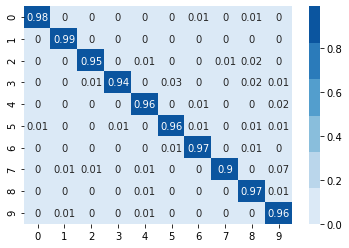

In [8]:
y_pred = model.predict_classes(x_test)
conf_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_pred).numpy()

# displaying
Visualizer.heatmap(conf_matrix)

### Model | Predictions

Taking an image from the test set represented as `image_index` and predicting a digit from it.

predictions [[0.     0.     0.     0.     0.     0.9995 0.0001 0.     0.0004 0.    ]]


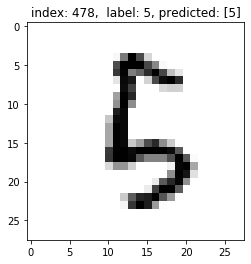

In [16]:
image_index = 478

# predicting
image = np.array([x_test[image_index]])
predictions = model.predict(image)
print('predictions', predictions)

# encoding
encoded_predictions = Encoder.encode(predictions)
predicted = Encoder.hot_indexes(np.array(encoded_predictions))

# displaying
Visualizer.image(image_index, x_test, y_test, predicted)

# Draw own digits

https://sketch.io/sketchpad/

set height and width to 28 x 28, and use white strokes with black background

predictions [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
predicted [3]


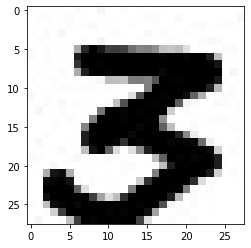

In [11]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from matplotlib import pyplot as plt

def load_image(path):
    image = load_img(path, grayscale=True)
    numpy_array = img_to_array(image)
    formatted_image = [row.flatten() for row in numpy_array]
    return np.array(formatted_image)

image = load_image('../drawings/3.jpeg')
plt.imshow(image, cmap='gray_r')

predictions = model.predict(np.array([image]))
print('predictions', predictions)

# encoding
encoded_predictions = Encoder.encode(predictions)
predicted = Encoder.hot_indexes(np.array(encoded_predictions))
print('predicted', predicted)